In [37]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')


In [9]:
df = pd.read_csv("audi.csv")

# bmw.xlsx
# df = pd.read_excel("bmw.xlsx")

print(type(df))
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,47.9,1.4


In [4]:
print(df["fuelType"].value_counts())

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64


In [12]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

# df_fuelType = np.round(df_fuelType, 2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


Create a Pie chart using the 'fuelType' column

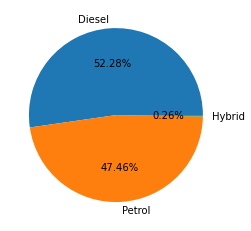

In [19]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.2f%%', 
                                       startangle=0)
plt.ylabel("")
plt.show()

Pie chart created using fuelType data, Hybrid car type is only 0.26%, contributing very tiny part in the pie chart and can not be seen clearly. It may be an example of bad data visualization.

Create a Barplot using the 'fuelType' column

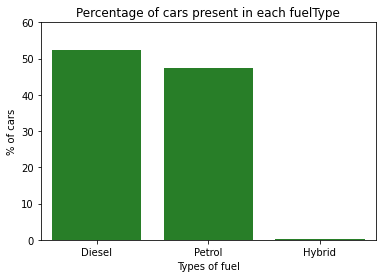

In [29]:
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="green",
            alpha=0.9)

plt.xlabel("Types of fuel")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each fuelType")

plt.yticks(np.arange(0,70,10))

plt.show()

Bar plot created using fuelType data, we found that Hybrid car type creates very tiny part in the plot and can not be seen clearly. It may be a example of bad data visualization. So now we will try with another data type "transmission"

In [30]:
print(df["transmission"].value_counts())

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64


In [31]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"no_of_cars"})

df_transmission["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])*100

df_transmission = df_transmission.round(2)

# df_transmission = np.round(df_transmission, 2)

display(df_transmission)

,transmission,no_of_cars,% of cars
0,Manual,4369,40.95
1,Semi-Auto,3591,33.66
2,Automatic,2708,25.38


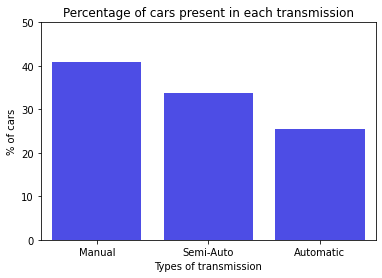

In [36]:
sns.barplot(x="transmission", 
            y="% of cars", 
            data=df_transmission, 
            color="b",
            alpha=0.8)

plt.xlabel("Types of transmission")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each transmission")

plt.yticks(np.arange(0,51,10))

# integer

plt.show()

Bar plot created using transmission data is clearly understandable and may be an example of good data visualization.

Data Visualization: Scatter plot, Regression line and Pair Plot

In [38]:
print(len(df["model"].unique()))

26


In [39]:
print(df["transmission"].unique())

['Manual' 'Automatic' 'Semi-Auto']


In [40]:
print(df["fuelType"].unique())

['Petrol' 'Diesel' 'Hybrid']


In [41]:
print(len(df["transmission"].unique()))

3


In [42]:
print(df.shape)

(10668, 8)


In [43]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


In [45]:
# another way to check missing value
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

Scatterplot of mileage vs price
Scatterplot of mpg vs price

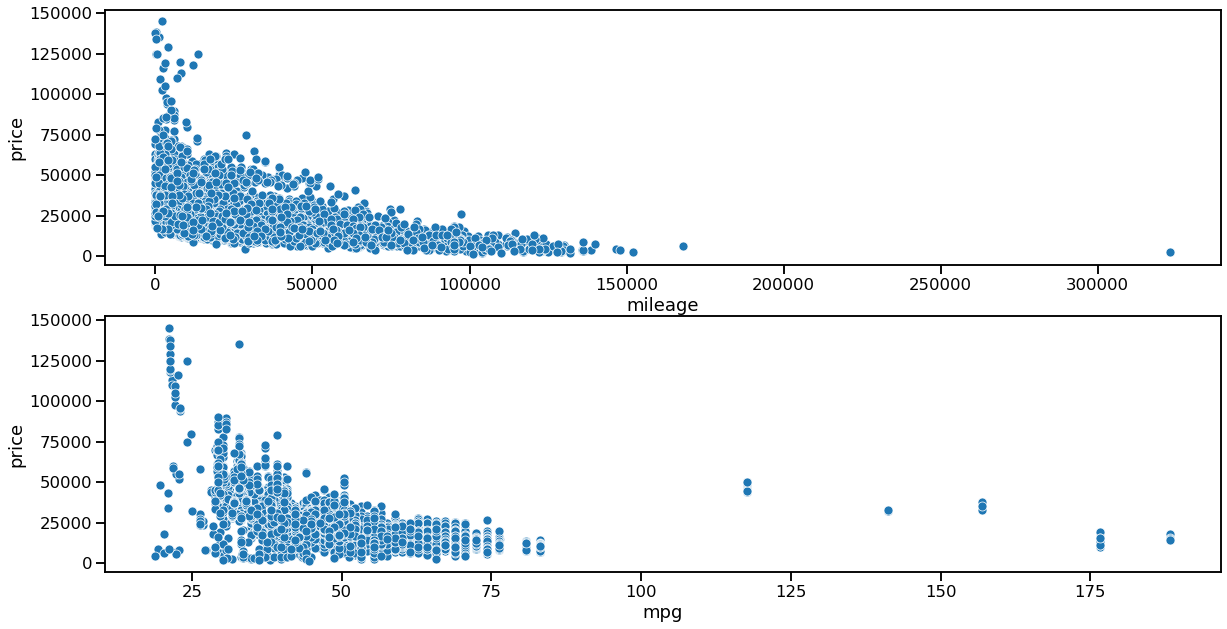

In [57]:
plt.figure(figsize=(20,16))

plt.subplot(3, 1, 1)
sns.scatterplot(x="mileage", y="price", data=df)

plt.subplot(3, 1, 2)
sns.scatterplot(x="mpg", y="price", data=df)
#plt.tight_layout()
plt.show()

Changing the hue parameter

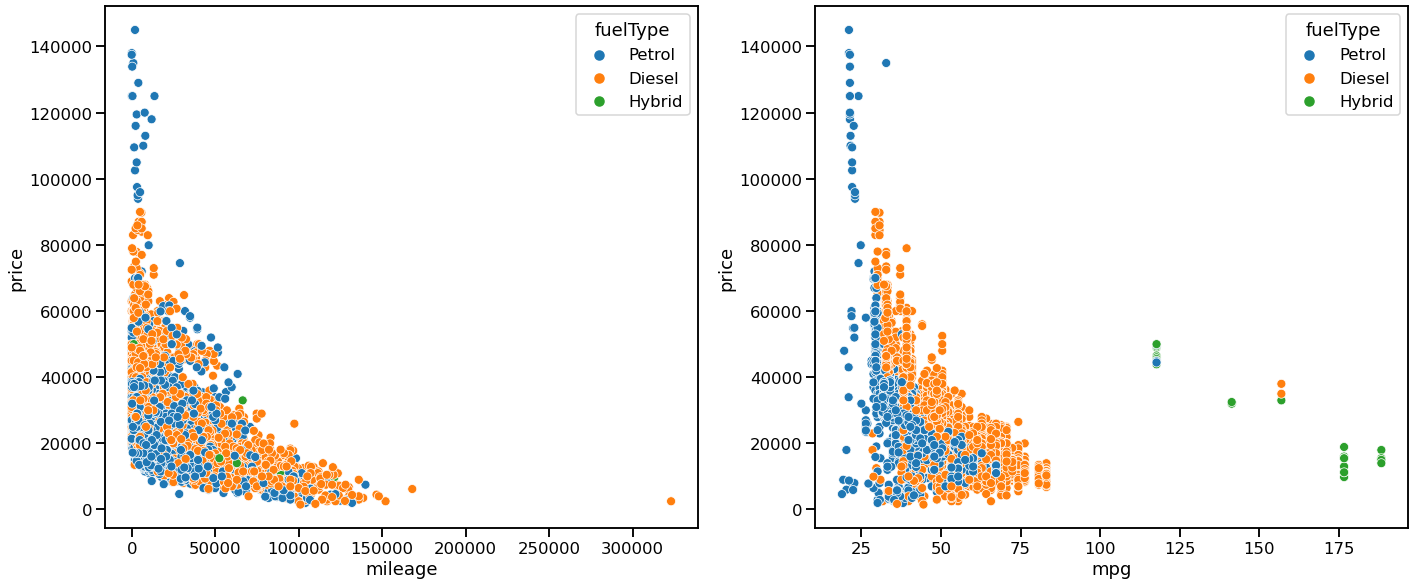

In [53]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")

plt.tight_layout()
plt.show()

PAIRPLOT

In [59]:
penguins = sns.load_dataset("penguins")

display(penguins.head())
display(penguins.tail())
print(penguins.shape)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


(344, 7)


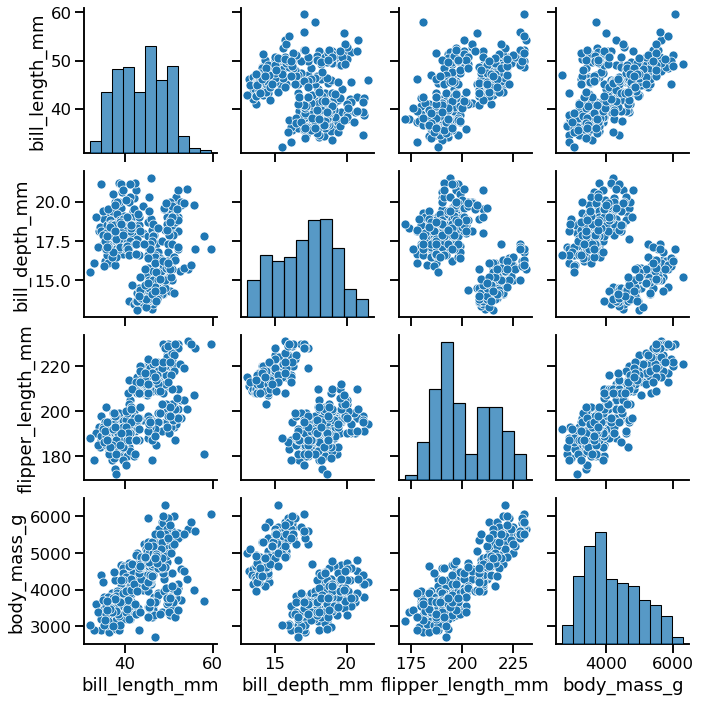

In [60]:
sns.pairplot(penguins)
plt.show()

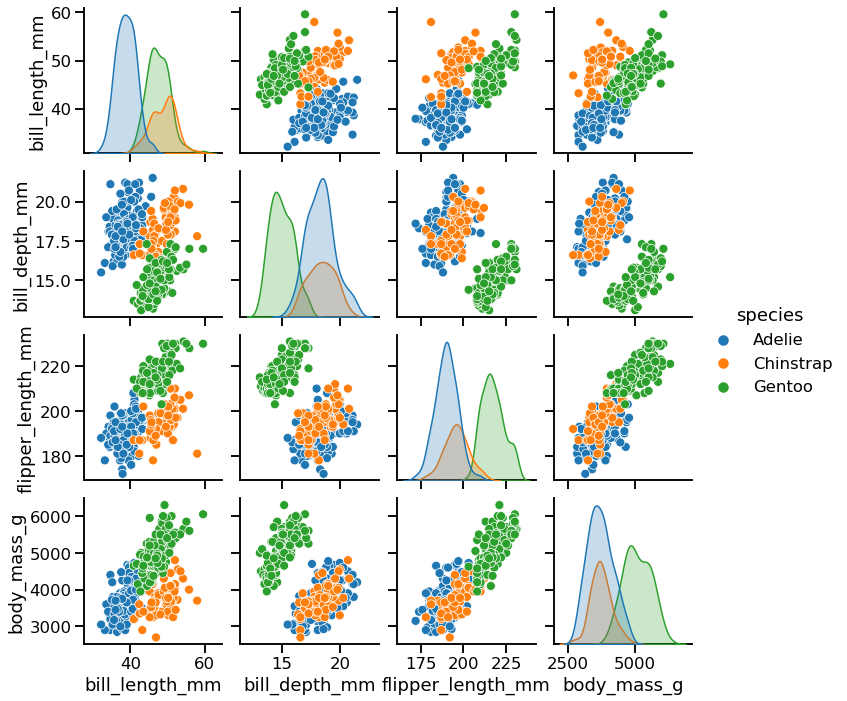

In [62]:
sns.pairplot(penguins, hue=("species"))
plt.show()